BUAD 5092 Module 4

Jason Street

# Part 1
## Preliminary Calculations

Calculate the travel time on each arc (i.e., between each pair of cities) in hours. Assume that the initial 24-hour loading time is added to the travel time for all arcs leaving Boston. Furthermore, assume that a 10-hour rest period is added to the travel time for each arc for each full 11 hours of driving and again at the end of each arc to reset the driver’s 11-hour drive time clock for the subsequent arc.

For example, the travel time between Boston and Chicago is computed as follows: \
24-hour load time leaving Boston +
983 miles / 50 mph +
1 rest period * 10-hour rest +
10 hours of rest upon arriving in Chicago = 63.66 hours

You do not need to show these calculations in your PDF report. The travel times should be shown in your diagram (see next section).

# Part 2
## Supply Chain Modeling

When formulating and solving network problems, it is often useful to start by drawing a picture. Accounting for all modes of transportation and all timing considerations (e.g., travel, loading, rest, inspections) and using your preferred software application (e.g., PowerPoint, Paint, etc.) or drawing by hand, diagram the transportation network being considered in this scenario. Start from Boston and end in Nome. Clearly label all vertices and edge weights (travel times in hours).

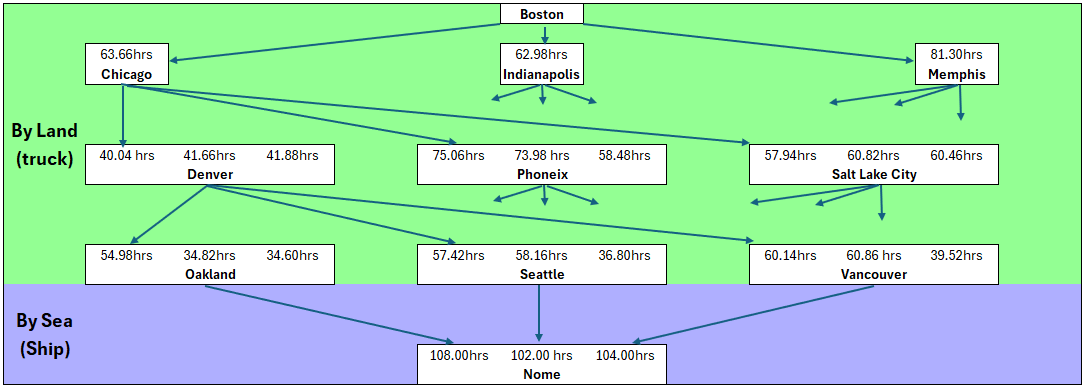

In [1]:
from IPython import display
display.Image("./M4_q2_screenshot.png")

# Part 3
## Greedy Algorithm

In the lectures for this module, we discussed the greedy algorithms. Solve for the shortest path using the greedy heuristic (in Python). What is the path and what is the total travel time in hours?

In [2]:
# Node dictionary with adjacent nodes and travel times
A = {
    'boston': [['chicago', 63.66], ['indianapolis', 62.98], ['memphis', 81.30]],
    'chicago': [['denver', 40.04], ['phoneix', 75.06], ['salt lake city', 57.94]],
    'indianapolis': [['denver', 41.66], ['phoneix', 73.98], ['salt lake city', 60.82]],
    'memphis': [['denver', 41.88], ['phoneix', 58.48], ['salt lake city', 60.46]],
    'denver': [['oakland', 54.98], ['seattle', 57.42], ['vancouver', 60.14]],
    'phoneix': [['oakland', 34.82], ['seattle', 58.16], ['vancouver', 60.86]],
    'salt lake city': [['oakland', 34.60], ['seattle', 36.80], ['vancouver', 39.52]],
    'oakland': [['nome', 108.00]],
    'seattle': [['nome', 102.00]],
    'vancouver': [['nome', 104.00]]
}

# Initialize parameters
## source
s = 'boston'
## destination
d = 'nome'
## large number, larger than the sum all travel times
M = 2000
## path
x = [s]
## unvisited nodes
u = ['chicago', 'indianapolis', 'memphis', 'denver', 'phoneix', 'salt lake city', 'oakland', 'seattle', 'vancouver', 'nome']
## total distance
total_time = 0

# loop until path reaches destination
while x[-1] != d:
    # reset closest distance to a large number
    ttime = M
    # loop over nodes that are adjacent to the last node in the path
    for j in A[x[-1]]:
        # only consider unvisited nodes
        if j[0] in u:
            # choose the node that is closest
            if j[1] < ttime:
                # save its label
                k = j[0]
                # save its distance
                ttime = j[1]
    # add closest node to the path
    x.append(k)
    # ...and remove it from the unvisited nodes list
    u.remove(k)
    # increment total distance
    total_time = total_time + ttime

# print solution
print("The path is: %s" % x)
print("The total travel time is %s hours." % total_time)


The path is: ['boston', 'indianapolis', 'denver', 'oakland', 'nome']
The total travel time is 267.62 hours.


# Part 4
## Model Formulation

**Sets** \
$N$: set of cities \{Boston, Chicago,..., Nome\} \
$A$: set of city pair arcs

**Parameters** \
$s$: vector of supply at each node \
$d$: vector of demand at each node \
$C$: $C$: matrix of travel time, where $c_{i,j}$ is the time from city $i$ to city $j$

**Decision Variables** \
$x_{ij}$: =1 if the path includes the arc $(i,j)$, =0 otherwise

**Objective Function and Constraints** \
The optimization model is formulated as

\begin{equation*}
\begin{matrix}
\underset{x}{\min} & \underset{(i,j) \in A}{\sum}c_{i,j}x_{i,j} &\\
\textrm{s.t.} & \underset{i:(i,j) \in A}{\sum}x_{i,j} + s_j & = & \underset{k: (j,k) \in A}{\sum}x_{j,k} + d_j & \forall j \in N \\
& x_{i,j} & \geq & 0 & \forall (i,j) \in A \\
\end{matrix}
\end{equation*}

# Part 5
## Optimization Model

In [3]:
from gurobipy import *
import numpy as np

# Create a new model
m = Model('m4part5')

# Sets and Parameters
## Set of cities, supply data, demand data
N, s, d = multidict({
    'Boston': [1, 0],
    'Chicago': [0, 0],
    'Indianapolis': [0, 0],
    'Memphis': [0, 0],
    'Denver': [0, 0],
    'Phoenix': [0, 0],
    'Salt Lake City': [0, 0],
    'Oakland': [0, 0],
    'Seattle': [0, 0],
    'Vancouver': [0, 0],
    'Nome': [0, 1]})

## Set of city-city arcs, travel time data
A, c = multidict({
    ('Boston', 'Chicago'): 63.66,
    ('Boston', 'Indianapolis'): 62.98,
    ('Boston', 'Memphis'): 81.30,
    ('Chicago', 'Denver'): 40.04,
    ('Chicago', 'Phoenix'): 75.06,
    ('Chicago', 'Salt Lake City'): 57.94,
    ('Indianapolis', 'Denver'): 41.66,
    ('Indianapolis', 'Phoenix'): 73.98,
    ('Indianapolis', 'Salt Lake City'): 60.82,
    ('Memphis', 'Denver'): 41.88,
    ('Memphis', 'Phoenix'): 58.48,
    ('Memphis', 'Salt Lake City'): 60.46,
    ('Denver', 'Oakland'): 54.98,
    ('Denver', 'Seattle'): 57.42,
    ('Denver', 'Vancouver'): 60.14,
    ('Phoenix', 'Oakland'): 34.82,
    ('Phoenix', 'Seattle'): 58.16,
    ('Phoenix', 'Vancouver'): 60.86,
    ('Salt Lake City', 'Oakland'): 34.60,
    ('Salt Lake City', 'Seattle'): 36.80,
    ('Salt Lake City', 'Vancouver'): 39.52,
    ('Oakland', 'Nome'): 108.00,
    ('Seattle', 'Nome'): 102.00,
    ('Vancouver', 'Nome'): 104.00})

# Decision Variables
## Assignments
x = m.addVars(A, name='arc', lb=0)
m.update()

# Objective Function
## Minimize total travel time
m.setObjective(quicksum(c[i,j] * x[i,j] for (i,j) in A), GRB.MINIMIZE)
m.update()

# Constraints
## Flow balance constraints
m.addConstrs(x.sum('*',j) + s[j] == x.sum(j,'*') + d[j] for j in N)
m.update()

# Solve and Print Solution
m.optimize()
print("\n\n")
for i, j in A:
    if x[i,j].x == 1:
        print("Travel from city %s to city %s." % (i,j))
print("\nThe total travel time is %s." % m.objval)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-07-07
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-7700 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 11 rows, 24 columns and 48 nonzeros
Model fingerprint: 0x267ade65
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+01, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 6 columns
Presolve time: 0.01s
Presolved: 5 rows, 18 columns, 36 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0246000e+02   2.000000e+00   0.000000e+00      0s
       3    2.6040000e+02   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.01 seconds (0.00 work units)
Optimal objective  2.604000000e+02



Travel from city Boston t

# Part 6
## Business Interpretation and Sensitivity Analysis

**How should GE transport the turbines to Nome?**
GE should transport the turbines by the following path:
1. Boston to Chicago
2. Chicago to Salt Lake City
3. Salt Lake City to Seattle
4. Seattle to Nome

**How long should they expect it to take?**
Based on the sensitivity analysis, the travel best path remained the same as the original, and the bandwidth for travel times are: 
- Original travel times: 260.4 hours (appx 10.85 days)
- 10% decrease in travel times: 234.36 hours (appx 9.77 days)
- 10% increase in travel times: 286.44 hours (appx 11.93 days)

**How would you assess GE’s risk of incurring late penalties?**
GE has a maximum of 336 hours (14 days) to transport the turbines. The sensitivity analysis shows that even with a 10% increase in travel times, the total travel time is 286.44 hours, which is within the time limit. Thus, the risk of incurring late penalties i would consider to be low. However, any unforeseen delays beyond the modeled scenarios could increase the risk, so it is very important for them to monitor the transport progress closely and have contingency plans in place.
